# **1.DATA COLLECTION**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [5]:
df=pd.read_csv('dataset.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)


In [3]:
#printing the first few rows of the dataframe
df.head()

open        high         low       close  volume     marketCap  \
0  112.900002  118.800003  107.142998  115.910004     0.0  1.288693e+09   
1    3.493130    3.692460    3.346060    3.590890     0.0  6.229819e+07   
2  115.980003  124.663002  106.639999  112.300003     0.0  1.249023e+09   
3    3.594220    3.781020    3.116020    3.371250     0.0  5.859436e+07   
4  112.250000  113.444000   97.699997  111.500000     0.0  1.240594e+09   

                  timestamp crypto_name        date  
0  2013-05-05T23:59:59.999Z     Bitcoin  2013-05-05  
1  2013-05-05T23:59:59.999Z    Litecoin  2013-05-05  
2  2013-05-06T23:59:59.999Z     Bitcoin  2013-05-06  
3  2013-05-06T23:59:59.999Z    Litecoin  2013-05-06  
4  2013-05-07T23:59:59.999Z     Bitcoin  2013-05-07

In [4]:
#printing the shape of the dataframe
print(f"Shape of the dataframe: {df.shape}")


Shape of the dataframe: (72946, 9)


In [5]:
#checking the data types of the columns
print(f"Data types of the columns:\n{df.dtypes}")

Data types of the columns:
open           float64
high           float64
low            float64
close          float64
volume         float64
marketCap      float64
timestamp       object
crypto_name     object
date            object
dtype: object


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72946 entries, 0 to 72945
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open         72946 non-null  float64
 1   high         72946 non-null  float64
 2   low          72946 non-null  float64
 3   close        72946 non-null  float64
 4   volume       72946 non-null  float64
 5   marketCap    72946 non-null  float64
 6   timestamp    72946 non-null  object 
 7   crypto_name  72946 non-null  object 
 8   date         72946 non-null  object 
dtypes: float64(6), object(3)
memory usage: 5.0+ MB


In [7]:
#checking the summary statistics of the dataframe
df.describe()

open          high           low         close        volume  \
count  72946.000000  7.294600e+04  72946.000000  7.294600e+04  7.294600e+04   
mean     870.194495  8.964124e+02    844.060640  8.712949e+02  2.207607e+09   
std     5231.654470  5.398613e+03   5079.389387  5.235508e+03  9.617885e+09   
min        0.000000  1.022100e-10      0.000000  8.292000e-11  0.000000e+00   
25%        0.167916  1.767999e-01      0.158630  1.682982e-01  8.320618e+06   
50%        1.630666  1.717542e+00      1.541486  1.640219e+00  1.098756e+08   
75%       26.070557  2.756868e+01     24.791776  2.625195e+01  6.691398e+08   
max    67549.735581  1.621883e+05  66458.723733  6.756683e+04  3.509679e+11   

          marketCap  
count  7.294600e+04  
mean   1.474922e+10  
std    7.501159e+10  
min    0.000000e+00  
25%    1.860432e+08  
50%    1.268539e+09  
75%    5.118618e+09  
max    1.274831e+12

In [8]:
#checking null values in the dataframe
df.isnull().sum()

open           0
high           0
low            0
close          0
volume         0
marketCap      0
timestamp      0
crypto_name    0
date           0
dtype: int64

In [9]:
#check duplicate values in the dataframe
df.duplicated().sum()

np.int64(0)

### NO MISSING AND DUPLICATED VALUES

In [10]:
#change the date column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
print(df['date'].dtypes)
df['date'].head()


datetime64[ns]


0   2013-05-05
1   2013-05-05
2   2013-05-06
3   2013-05-06
4   2013-05-07
Name: date, dtype: datetime64[ns]

#  **2.EXPLORING DATA**

In [11]:
#change the timestamp column to datetime format and set UTC (which stands for Coordinated Universal Time and is the time standard used worldwide)
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True)
print(df['timestamp'].dtypes)
df['timestamp'].head()

datetime64[ns, UTC]


0   2013-05-05 23:59:59.999000+00:00
1   2013-05-05 23:59:59.999000+00:00
2   2013-05-06 23:59:59.999000+00:00
3   2013-05-06 23:59:59.999000+00:00
4   2013-05-07 23:59:59.999000+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

In [23]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'marketCap', 'timestamp',
       'crypto_name', 'date'],
      dtype='object')

In [13]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numeric columns in the dataframe: {numeric_columns}")

Numeric columns in the dataframe: ['open', 'high', 'low', 'close', 'volume', 'marketCap']


In [14]:
# proportion of count data on crypto_name columns
crypto_name_counts = df['crypto_name'].value_counts(normalize=True) * 100
crypto_name_counts


crypto_name
Bitcoin                  4.452609
Litecoin                 4.452609
XRP                      4.327859
Dogecoin                 4.145532
Monero                   3.928934
Stellar                  3.826118
Tether                   3.539605
Ethereum                 3.323006
Ethereum Classic         2.840457
Basic Attention Token    2.412744
EOS                      2.371617
Bitcoin Cash             2.341458
BNB                      2.338716
TRON                     2.270172
Decentraland             2.264689
Chainlink                2.260576
Cardano                  2.245497
Maker                    2.200258
Filecoin                 2.145423
Theta Network            2.097442
Huobi Token              2.074137
Ravencoin                2.026156
Tezos                    1.871247
VeChain                  1.826008
Quant                    1.816412
USD Coin                 1.735530
Cronos                   1.643682
Wrapped Bitcoin          1.579250
Cosmos                   1.520303
Po

## **2.1 UNIVARIATE ANALYSIS**

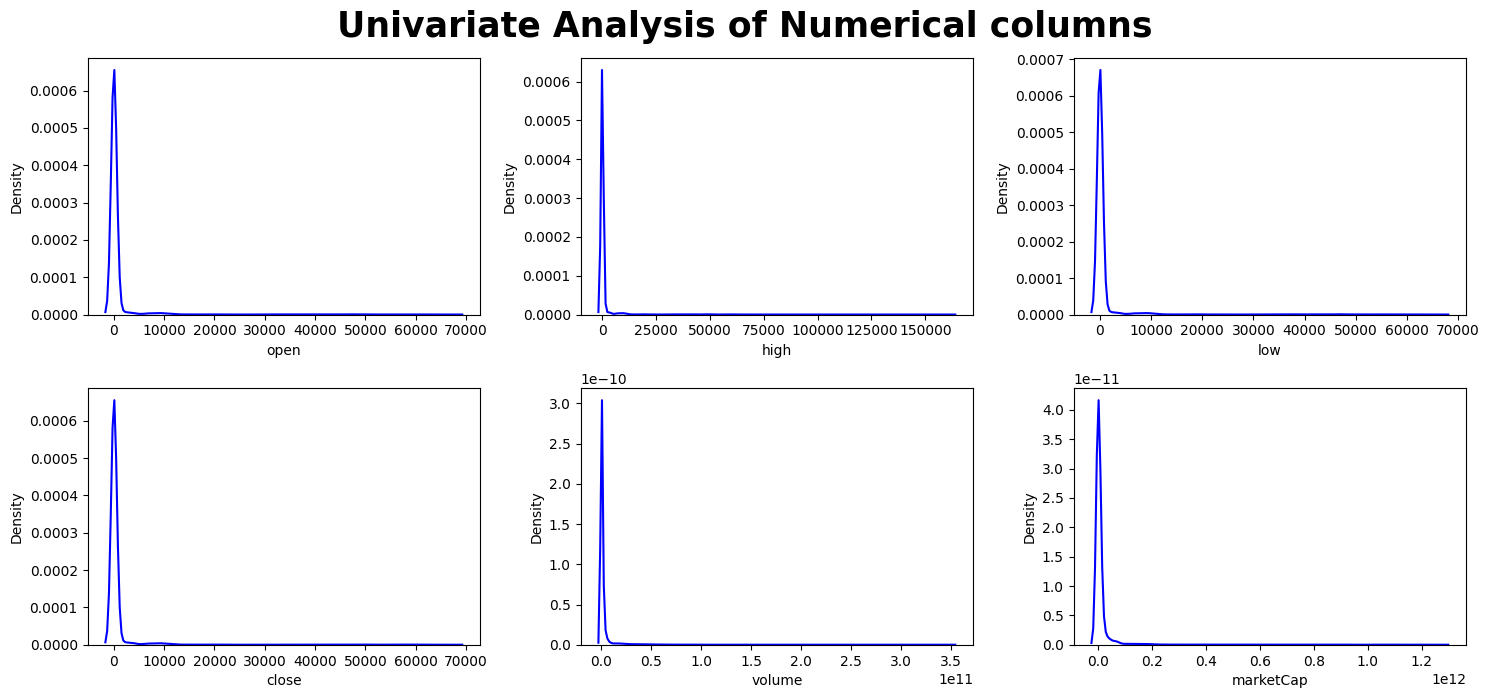

In [15]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical columns', fontsize=25, fontweight='bold')

for i in range(0, len(numeric_columns)):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(x=df[numeric_columns[i]], color='blue')
    plt.xlabel(numeric_columns[i])
    plt.tight_layout()

| Feature       | Observation                                                                                                  |
| ------------- | ------------------------------------------------------------------------------------------------------------ |
| **open**      | Majority of "open" prices are on the lower side; few cryptocurrencies start at very high prices.             |
| **high**      | The "high" prices have an even longer tail than "open", indicating large price spikes for some coins.        |
| **low**       | Follows a similar shape to "open", but possibly with slightly lower spread.                                  |
| **close**     | Matches closely with the "open" distribution; often cryptos don't close too far off from where they started. |
| **volume**    | Extremely skewed; most coins have low trading volume, but a few coins are traded in huge volumes.            |
| **marketCap** | Also very skewed; a handful of cryptocurrencies (like BTC, ETH) dominate total market cap.                   |


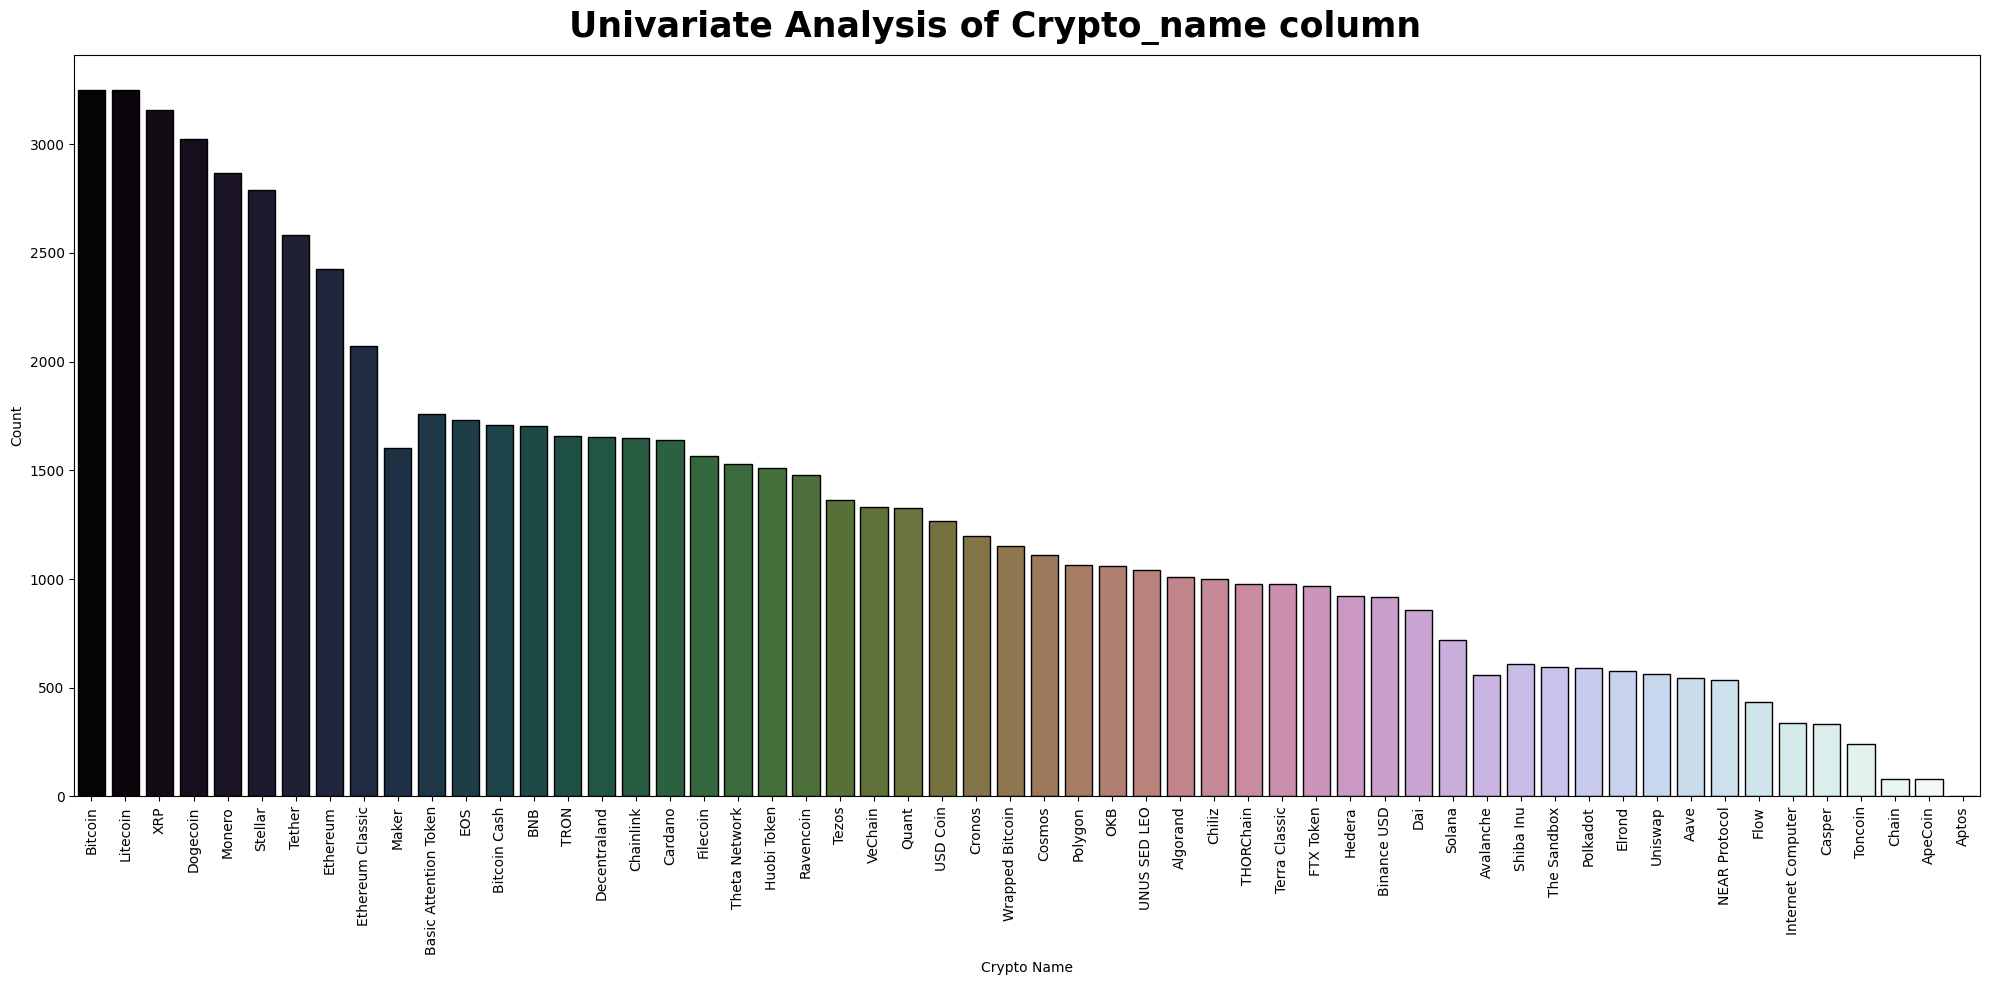

In [16]:
# Univariate Analysis of Crypto_name column
plt.figure(figsize=(20, 10))
plt.suptitle('Univariate Analysis of Crypto_name column', fontsize=25, fontweight='bold')
sns.countplot(x='crypto_name', data=df, palette='cubehelix',ec='black')
plt.xticks(rotation=90)
plt.xlabel('Crypto Name')
plt.ylabel('Count')
plt.tight_layout()

# **2.2 BIVARIATE  AND MULTIVARIATE ANALYSIS**

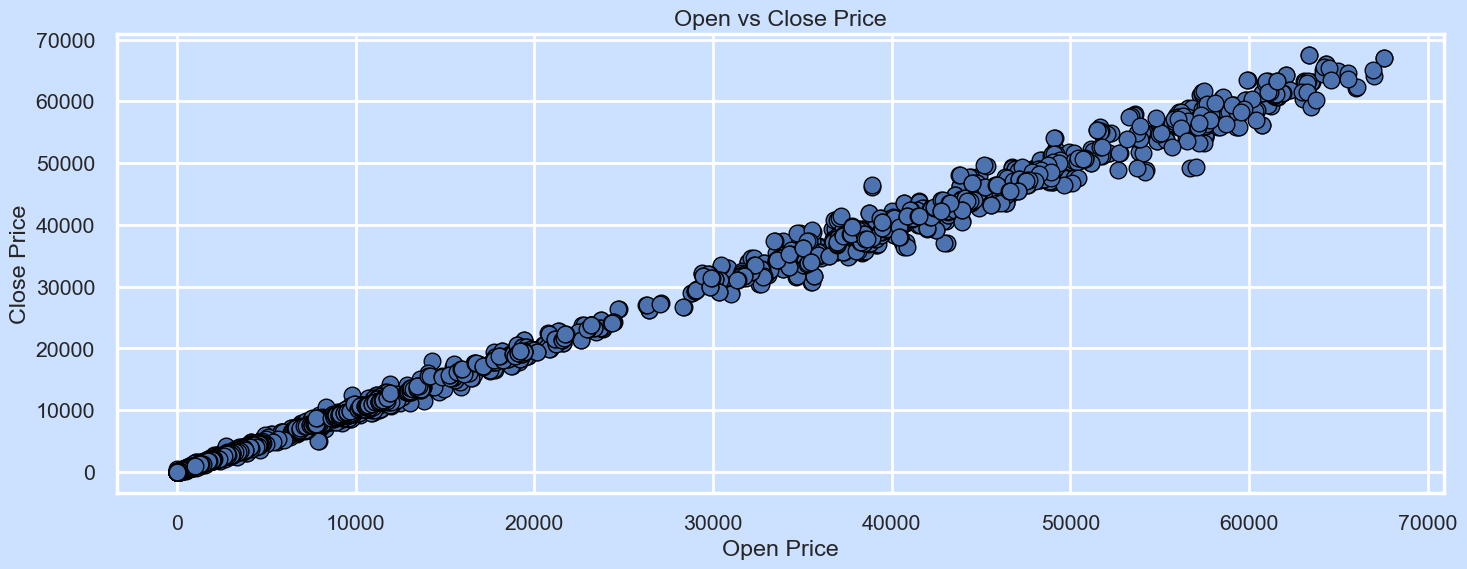

In [66]:
#scatter plot for open vs close price
plt.figure(figsize=(15, 6))
sns.scatterplot(x='open', y='close', data=df,ec='black',)
plt.title('Open vs Close Price')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.grid(True)
plt.tight_layout()
plt.show()


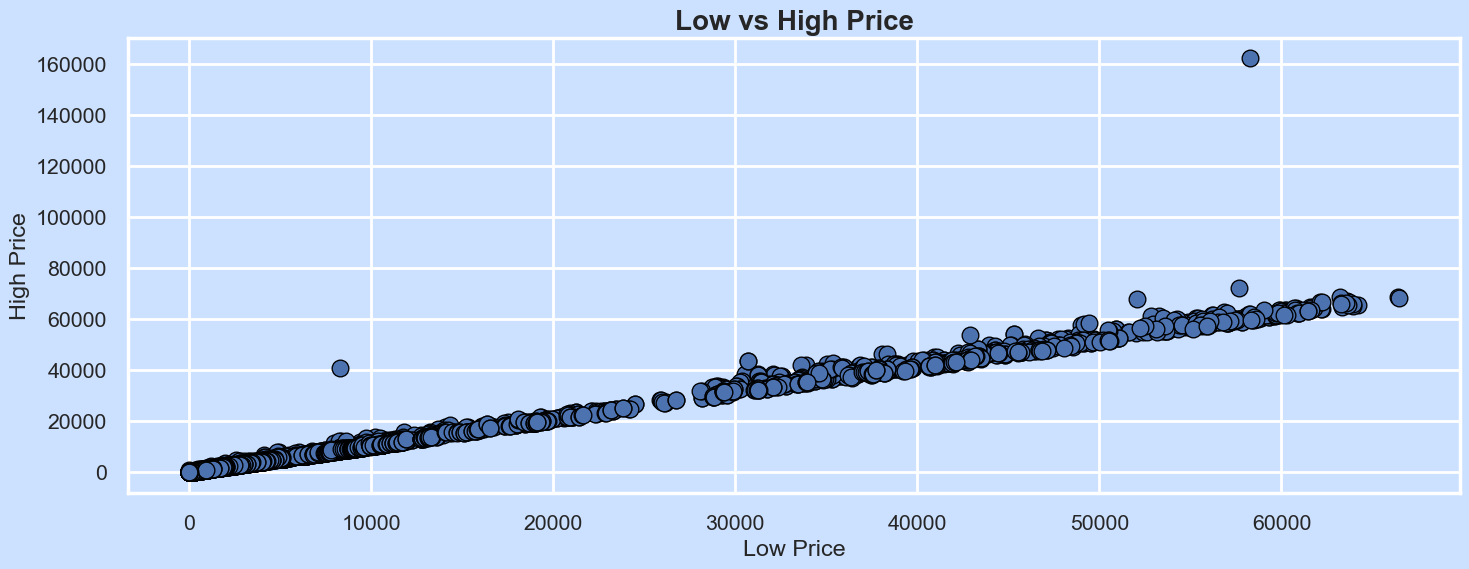

In [65]:
#scatter plot for low vs high price
plt.figure(figsize=(15, 6))
sns.scatterplot(x='low', y='high', data=df,ec='black',)
plt.title('Low vs High Price', fontsize=20, fontweight='bold')
plt.xlabel('Low Price')
plt.ylabel('High Price')
plt.grid(True)
plt.tight_layout()
plt.show()


### **2.2.1 Open, Close, High & Low Price Patterns of Major Cryptocurrencies**

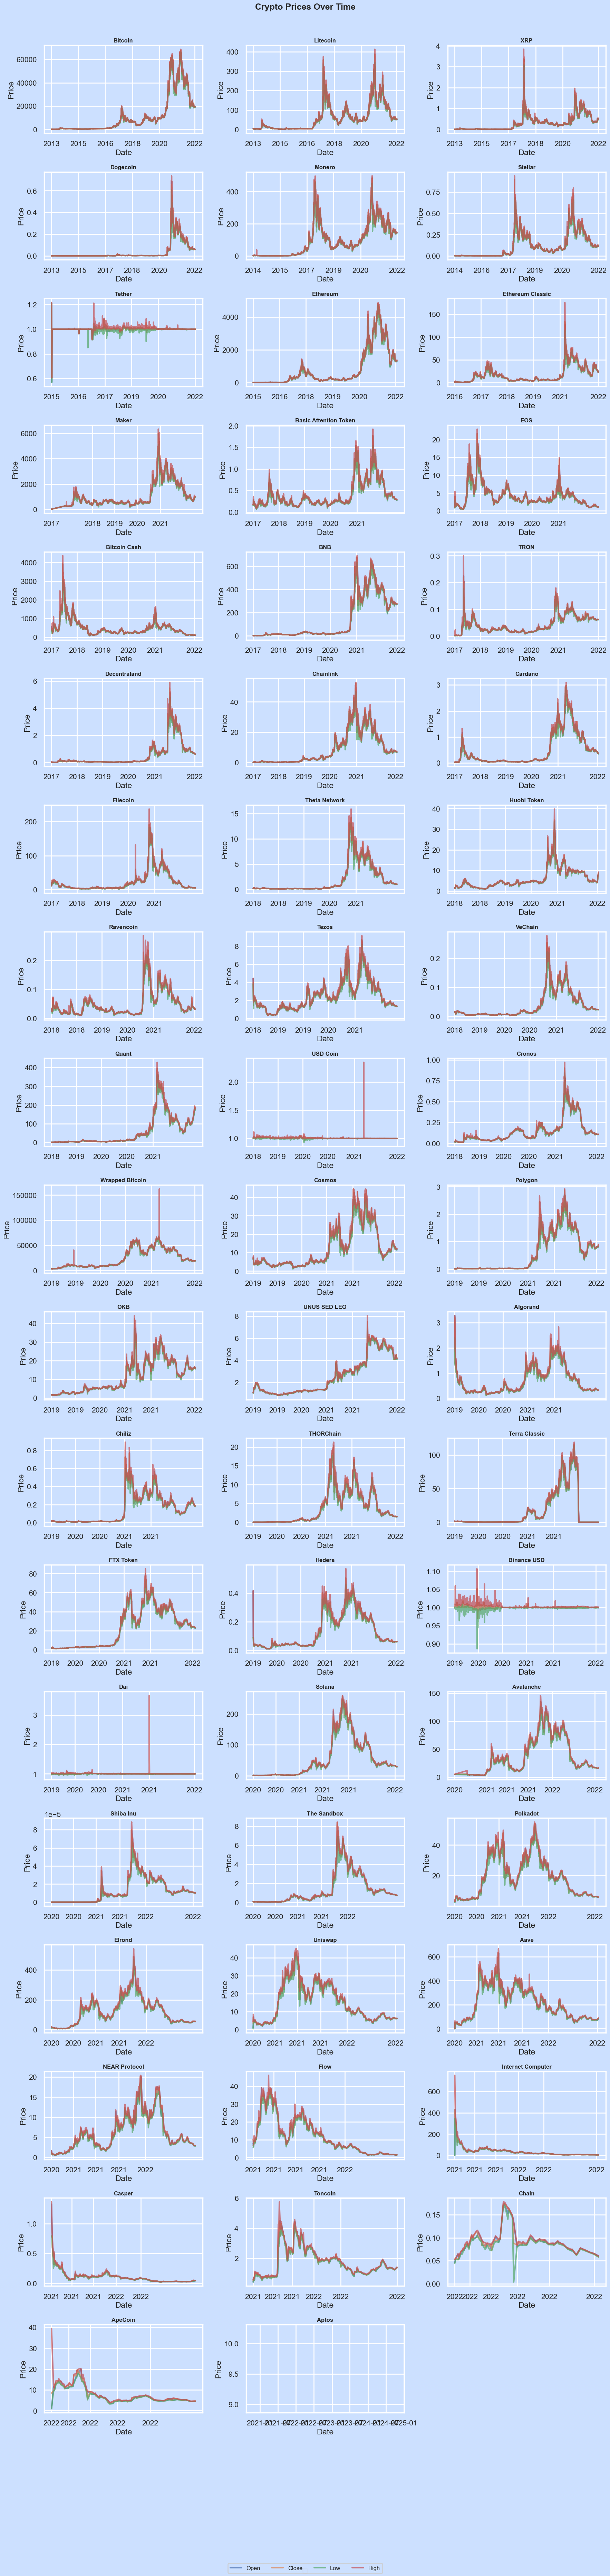

In [58]:

# Ensure 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Get unique crypto names
crypto_names = df['crypto_name'].unique()
num_cryptos = len(crypto_names)

# Set number of rows and columns for subplots
rows = (num_cryptos // 3) + 1
cols = 3

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 4), sharex=False)
axes = axes.flatten()
fig.legend(['Open', 'Close', 'Low', 'High'], loc='lower center', ncol=4, fontsize=12)
for i, name in enumerate(crypto_names):
    group = df[df['crypto_name'] == name]

    axes[i].plot(group['date'], group['open'], label='Open', alpha=0.7)
    axes[i].plot(group['date'], group['close'], label='Close', alpha=0.7)
    axes[i].plot(group['date'], group['low'], label='Low', alpha=0.7)
    axes[i].plot(group['date'], group['high'], label='High', alpha=0.7)

    axes[i].set_title(f"{name}", fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Price')
    axes[i].tick_params(axis='x')
    axes[i].grid(True)

    # Show fewer x-axis date ticks for readability
    if len(group) > 5:
        xticks = group['date'][::len(group)//5]
        axes[i].set_xticks(xticks)
        axes[i].set_xticklabels(xticks.dt.strftime('%Y'))

# Hide empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add a global legend
fig.legend(['Open', 'Close', 'Low', 'High'], loc='lower center', ncol=4, fontsize=12)

# Adjust layout
plt.tight_layout(rect=[0, 0.05, 1, 0.97])
plt.suptitle('Crypto Prices Over Time', fontsize=18, fontweight='bold')
plt.show()




## Key Observations
- Bitcoin, Ethereum, and Litecoin exhibit significant price surges around late 2017 and again in 2021, aligning with major crypto bull markets.

- Stablecoins like Tether (USDT) and USD Coin (USDC) maintain relatively flat price lines, reflecting their design to track fiat currencies.

- Cryptocurrencies such as Shiba Inu, Dogecoin, and Pepe show sudden spikes and rapid corrections, indicating speculative trading behavior.

- Newly emerged or low-volume tokens (e.g., Akita, Aidos) have sparse or highly volatile data, suggesting limited adoption or trading activity.

---

### **2.2.2 CHECKING MULTICOLLINEARITY FOR NUMERIC COLUMNS**

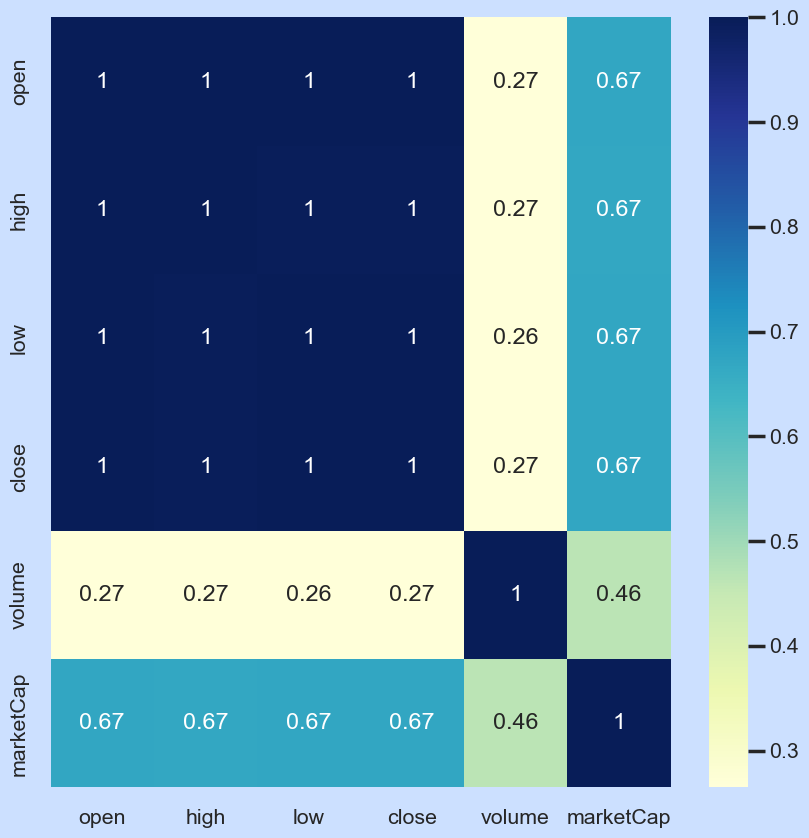

In [57]:
plt.figure(figsize = (10,10))
num_features = numeric_columns.copy()

sns.heatmap(df[num_features].corr(), annot=True, cmap="YlGnBu")
plt.show()

###  REPORT:

- **Open**, **High**, **Low**, and **Close** prices are **perfectly correlated** (correlation = 1.00), indicating they move together in time.
- **Market Capitalization** shows a **moderate correlation (~0.67)** with price variables, as expected from its dependency on price and circulating supply.
- **Trading Volume** exhibits a **weak correlation (~0.26–0.27)** with prices, suggesting that price movements are not tightly linked to trading activity in this dataset.

This analysis confirms expected market behavior and highlights that price indicators are closely linked, while volume can vary more independently.

---

**Volume** represents the total amount of a cryptocurrency traded (bought and sold) over a specific period of time.

- It shows how much of the crypto asset has changed hands.
- High volume = more interest and higher liquidity.
- Low volume = less trading activity and lower liquidity.

In [29]:
#setting plotting options

sns.set_style("white")
sns.set(rc={"axes.facecolor":"#cce0ff","figure.facecolor":"#cce0ff"})
sns.set_context("poster",font_scale = .7)


### **2.2.3 Average Trading Volume per Cryptocurrency**

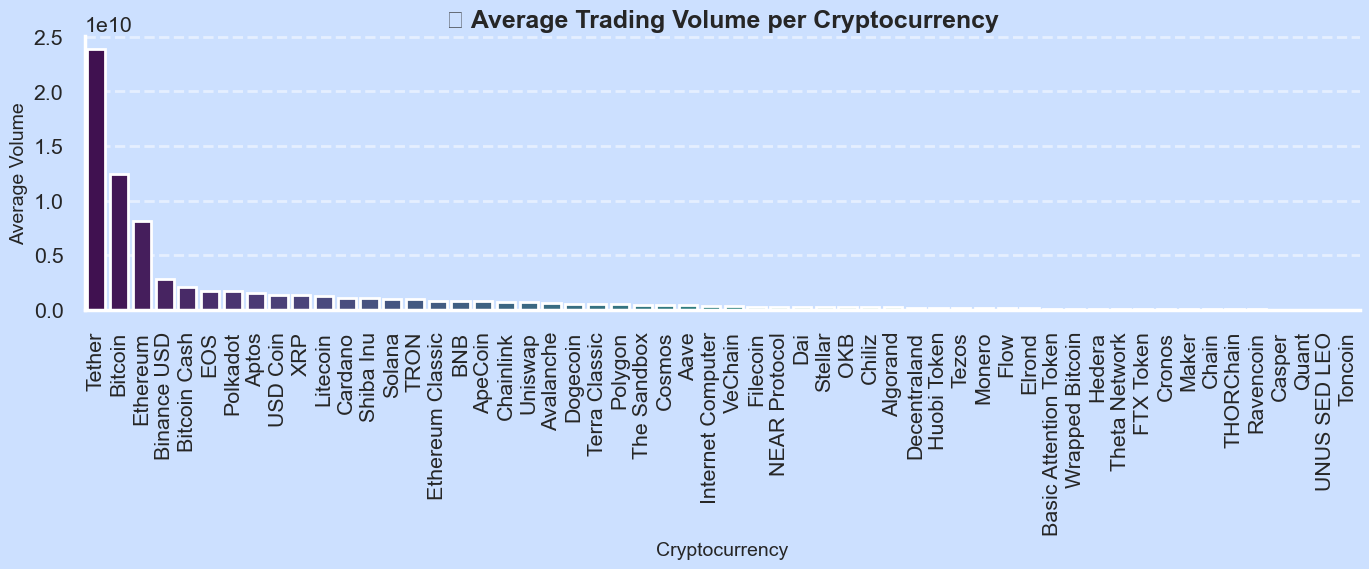

In [ ]:

# Set your beautiful Seaborn style
sns.set_style("white")
sns.set(rc={"axes.facecolor":"#cce0ff", "figure.facecolor":"#cce0ff"})
sns.set_context("poster", font_scale=0.7)

# Group by crypto_name and compute average volume
avg_volume = df.groupby('crypto_name')['volume'].mean().sort_values(ascending=False)

# Create bar plot
plt.figure(figsize=(14, 6))
sns.barplot(x=avg_volume.index, y=avg_volume.values, palette="viridis")

# Add labels and title
plt.title(" Average Trading Volume per Cryptocurrency", fontsize=18, weight='bold')
plt.xlabel("Cryptocurrency", fontsize=14)
plt.ylabel("Average Volume", fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Optional: Remove top and right spines for clean look
sns.despine()

plt.tight_layout()
plt.show()


### **REPORT:**

The bar plot below displays the average daily trading volume for each cryptocurrency. The data reveals a highly uneven distribution:

- **Tether (USDT)** leads with an extraordinarily high average volume, reflecting its role as a preferred stablecoin for trading.
- **Bitcoin (BTC)** and **Ethereum (ETH)** maintain strong positions due to their market dominance.
- The remaining cryptocurrencies exhibit much lower volumes, highlighting differences in market activity, adoption, and trader interest.

This skewed pattern emphasizes that **market liquidity and attention are heavily concentrated in just a few assets**, which may influence volatility, price impact, and investor behavior.

---

###  What is Market Cap in Cryptocurrency?

**Market Cap** (*Market Capitalization*) is the **total value** of a cryptocurrency in circulation. It gives a snapshot of the coin's size and importance in the market.

 - Formula: Market Cap = Current Price per Coin × Circulating Supply





### **2.2.4 Average Market Cap by Cryptocurrency**

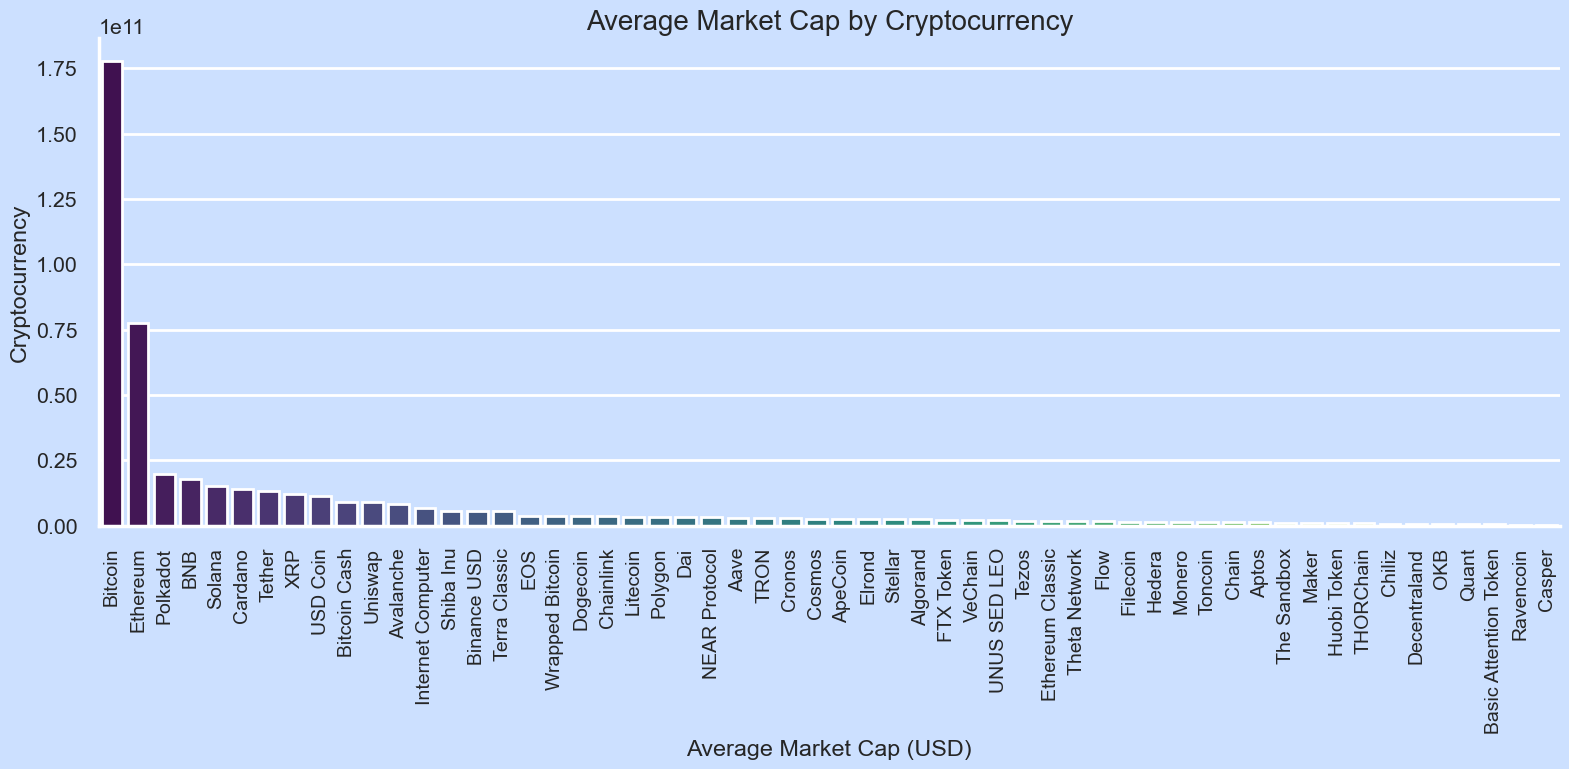

In [ ]:
avg_marketcap = df.groupby("crypto_name")["marketCap"].mean().sort_values(ascending=False)

# Set seaborn style
sns.set_style("white")
sns.set(rc={"axes.facecolor": "#cce0ff", "figure.facecolor": "#cce0ff"})
sns.set_context("poster", font_scale=0.7)

# Plot
plt.figure(figsize=(16, 8))
sns.barplot(y=avg_marketcap.values, x=avg_marketcap.index, palette="viridis")
plt.title("Average Market Cap by Cryptocurrency", fontsize=20)
plt.xlabel("Average Market Cap (USD)")
plt.ylabel("Cryptocurrency")
sns.despine(top=True, right=True)
plt.xticks(rotation=90,fontsize=14)
plt.tight_layout()
plt.show()

### **REPORT:**

**Market Capitalization** = Price × Circulating Supply  
It represents the total value of a cryptocurrency in the market.

####  Key Insights:
- **Bitcoin** has the highest average market cap — by a large margin.
- **Ethereum** ranks second but is significantly behind Bitcoin.
- Others like **Polkadot, BNB, Solana, Cardano, Tether**, etc., show much lower values.
- The market is **top-heavy**, dominated by a few major coins.

####  Top 5 by Avg. Market Cap:
1. Bitcoin  
2. Ethereum  
3. Polkadot  
4. BNB  
5. Solana

####  Conclusion:
Market cap indicates the **size and dominance** of a coin. Most crypto value is concentrated in the top few assets.

---


### **2.2.4 Distribution of Open, Close, High, and Low Prices by Cryptocurrency**

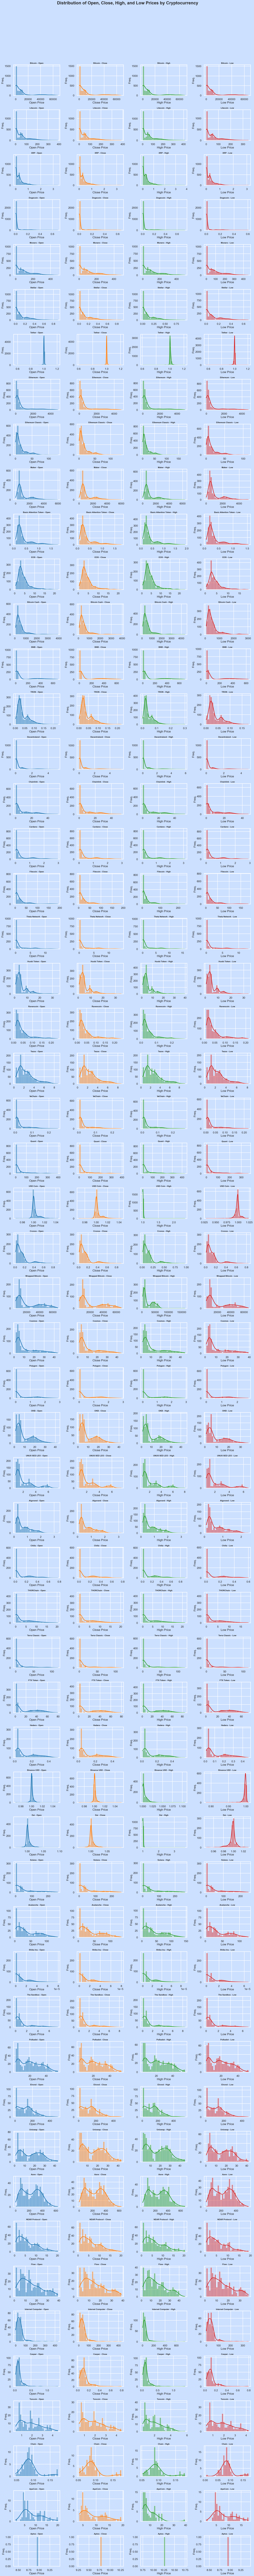

In [67]:
cryptos = df["crypto_name"].unique()

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=len(cryptos), ncols=4, figsize=(20, len(cryptos) * 3.5))
fig.suptitle(" Distribution of Open, Close, High, and Low Prices by Cryptocurrency", fontsize=24, weight='bold', y=1.02)

# Colors for each price type
colors = {
    "open": "#1f77b4",   # Blue
    "close": "#ff7f0e",  # Orange
    "high": "#2ca02c",   # Green
    "low": "#d62728"     # Red
}

# Plot histograms for each crypto
for i, crypto in enumerate(cryptos):
    crypto_df = df[df["crypto_name"] == crypto]
    
    # Plot Open
    sns.histplot(data=crypto_df, x="open", bins=30, kde=True, ax=axes[i, 0], color=colors["open"])
    axes[i, 0].set_title(f"{crypto} - Open", fontsize=11, weight='bold')
    axes[i, 0].set_xlabel("Open Price")
    axes[i, 0].set_ylabel("Freq.")

    # Plot Close
    sns.histplot(data=crypto_df, x="close", bins=30, kde=True, ax=axes[i, 1], color=colors["close"])
    axes[i, 1].set_title(f"{crypto} - Close", fontsize=11, weight='bold')
    axes[i, 1].set_xlabel("Close Price")
    axes[i, 1].set_ylabel("Freq.")

    # Plot High
    sns.histplot(data=crypto_df, x="high", bins=30, kde=True, ax=axes[i, 2], color=colors["high"])
    axes[i, 2].set_title(f"{crypto} - High", fontsize=11, weight='bold')
    axes[i, 2].set_xlabel("High Price")
    axes[i, 2].set_ylabel("Freq.")


    # Plot Low
    sns.histplot(data=crypto_df, x="low", bins=30, kde=True, ax=axes[i, 3], color=colors["low"])
    axes[i, 3].set_title(f"{crypto} - Low", fontsize=11, weight='bold')
    axes[i, 3].set_xlabel("Low Price")
    axes[i, 3].set_ylabel("Freq.")

# Adjust layout
plt.tight_layout()
plt.show()
plt.show()


- **KDE Curve** helps visualize the shape and spread of price values.
- You can observe volatility, skewness, and common price ranges.
- Useful for identifying price clusters and outliers.

---

## **Final Report**

- We analyzed multiple cryptocurrencies to understand patterns in **Volume**, **Market Cap**, and **Price (Open, High, Low, Close)** data.

- We calculated the **average volume** and **average market cap** for each coin and visualized them using **bar plots**. This helped identify coins with the highest trading activity and market dominance.

- The **price distribution** was visualized using `histplot` for Open, High, Low, and Close values. A narrow x-axis range was used to highlight fine-grained fluctuations in prices.

- Volume and Market Cap columns varied significantly between cryptocurrencies, indicating diverse market behaviors.

- Some price columns had overlapping distributions, suggesting similar price behavior across certain cryptocurrencies.

- No columns were dropped in this EDA phase, but further feature engineering (like removing outliers or scaling) can be considered for model building.

---
